In [4]:
import numpy as np
import pandas as pd

In [5]:
np.random.seed(42)

df = pd.DataFrame({
    "student_id": range(1, 501),
    "study_hours": np.random.randint(1, 10, 500),
    "attendance": np.random.randint(50, 100, 500),
    "exam_score": np.random.randint(30, 100, 500)
})


In [6]:
# Basic inspection
df.head()
df.tail()
df.sample(5)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   student_id   500 non-null    int64
 1   study_hours  500 non-null    int32
 2   attendance   500 non-null    int32
 3   exam_score   500 non-null    int32
dtypes: int32(3), int64(1)
memory usage: 9.9 KB


In [7]:
# Feature engineering
df["performance"] = pd.cut(
    df["exam_score"],
    bins=[0, 50, 75, 100],
    labels=["Low", "Medium", "High"]
)

In [8]:
# Statistical analysis
df.describe()
df[["study_hours", "attendance", "exam_score"]].mean()

study_hours     4.906
attendance     73.926
exam_score     64.308
dtype: float64

In [9]:
# Group analysis
df.groupby("performance")["exam_score"].agg(["mean", "min", "max", "count"])

C:\Users\likhi\AppData\Local\Temp\ipykernel_12976\790009808.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby("performance")["exam_score"].agg(["mean", "min", "max", "count"])


,mean,min,max,count
performance,,,,
Low,39.958904,30,50,146
Medium,62.881720,51,75,186
High,87.047619,76,99,168


In [10]:
# Filtering
high_performers = df[(df["study_hours"] > 6) & (df["attendance"] > 80)]

In [11]:
# Sorting
df.sort_values("exam_score", ascending=False).head(10)

,student_id,study_hours,attendance,exam_score,performance
255,256,3,85,99,High
72,73,9,90,99,High
393,394,7,51,99,High
179,180,2,76,99,High
447,448,1,89,99,High
340,341,3,80,99,High
152,153,3,52,98,High
398,399,2,50,98,High
221,222,8,78,98,High
13,14,6,77,98,High


In [12]:
# Correlation
df.corr(numeric_only=True)

,student_id,study_hours,attendance,exam_score
student_id,1.000000,-0.047810,-0.017097,0.028112
study_hours,-0.047810,1.000000,0.046094,-0.005830
attendance,-0.017097,0.046094,1.000000,-0.042155
exam_score,0.028112,-0.005830,-0.042155,1.000000


In [13]:
#Visualization (Matplotlib + Seaborn)

import matplotlib.pyplot as plt
import seaborn as sns

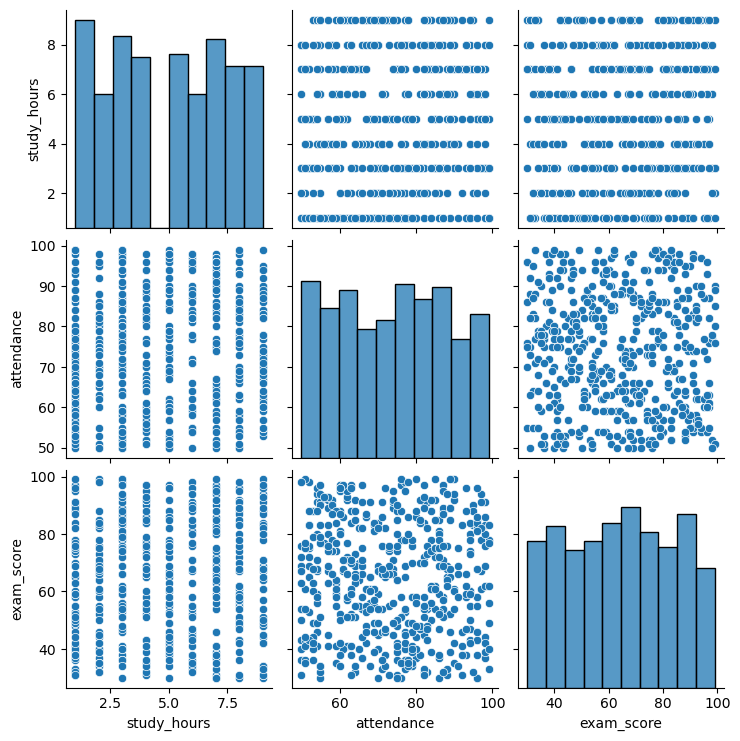

In [14]:
# Pairplot
sns.pairplot(df[["study_hours", "attendance", "exam_score"]])
plt.show()

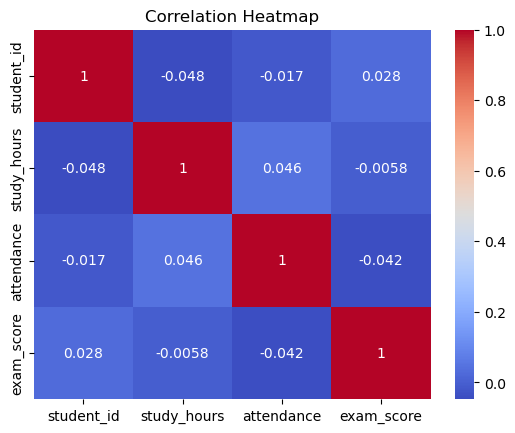

In [15]:
# Heatmap
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

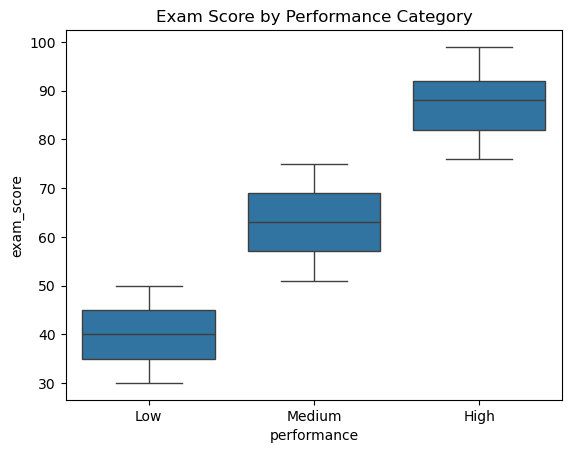

In [16]:
# Boxplot
sns.boxplot(x="performance", y="exam_score", data=df)
plt.title("Exam Score by Performance Category")
plt.show()

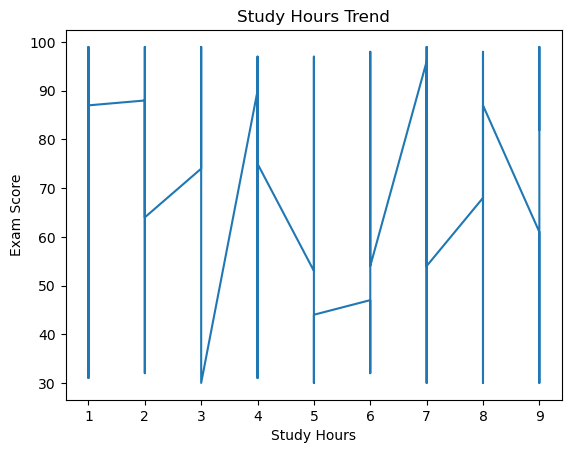

In [17]:
# Line plot (sorted)
df_sorted = df.sort_values("study_hours")
plt.plot(df_sorted["study_hours"], df_sorted["exam_score"])
plt.xlabel("Study Hours")
plt.ylabel("Exam Score")
plt.title("Study Hours Trend")
plt.show()